In [77]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Loading the data

data = pd.read_csv('Covid_19_tweets_train.csv',  engine='python')
data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"أœT: 36.319708,-82.363649",16-03-2020,As news of the regionآ’s first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [79]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


From the information above we can notice that there is null values in the location column.
the UserName and ScreenName columns have integers values, and the other four columns have objects.

The first tweet is messy because it has mentions, stop words, and urls.
We want to remove all these elements in the cleaning process from all tweets.
So after finishing the cleaning process, the first tweet will disappear.

In [80]:
# First tweet
data["OriginalTweet"][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

1 - Text Cleaning:

In [81]:
# Text Cleaning
def clean_by_pattern(text, pattern):
  '''repalcing a matched pattern in a text with a single space, and return a list of the text sentences.'''
  cleaned_data = []
  for d in text:
    cleaned_data.append(re.sub(pattern,' ',str(d)))
    
  return cleaned_data

patterns = [r"https://(\S*)", r"@(\S*)", r"[^a-zA-Z#]", r"\s\s+", r'\s+[a-zA-Z]\s+']

temp = []
cleaned_tweets = []
cleaned_tweets = clean_by_pattern(data["OriginalTweet"], patterns[0]) # remove urls and images
temp = clean_by_pattern(cleaned_tweets, patterns[1]) # remove mentions
cleaned_tweets = clean_by_pattern(temp, patterns[2]) # remove the rest(numbers, punctuations, ....) except the hashtags.
temp = clean_by_pattern(cleaned_tweets, patterns[3]) # replace multiple space (which we have after applying the previous pattern) with single space. 
cleaned_tweets = clean_by_pattern(temp, patterns[4]) # remove single characters (which we have after applying the previous pattern).
# convert all tweets characters to lower case.
temp = []
for itr in range(0, len(cleaned_tweets)):
    temp.append(cleaned_tweets[itr].lower())
cleaned_tweets = temp

In [82]:
cleaned_tweets[:10]

[' and and ',
 'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid outbreak ',
 'my food stock is not the only one which is empty please don panic there will be enough food for everyone if you do not take more than you need stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral ',
 'me ready to go at supermarket during the #covid outbreak not because m paranoid but because my food stock is litteraly empty the #coronavirus is serious thing but please don panic it causes shortage #coronavirusfrance #restezchezvous #stayathome #confinement ',
 'as news of the region first confirmed covid case came out of sullivan county last week people flocked to area s

In [83]:
# Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stwd = stopwords.words('english')

def content_fraction(text):
    content = [w for w in " ".join(text).split(" ") if w not in stwd]
    return len(content) / len(" ".join(text))
print(f"stopword fraction from the tweet: {content_fraction(cleaned_tweets)}")

final_cleaned_tweets_tokens = []
for tweet in cleaned_tweets:
    sentence = [w for w in tweet.split() if w not in stwd] 
    if sentence:
        final_cleaned_tweets_tokens.append(sentence)
final_cleaned_tweets_tokens[:3]

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


stopword fraction from the tweet: 0.10441698893832263


[['advice',
  'talk',
  'neighbours',
  'family',
  'exchange',
  'phone',
  'numbers',
  'create',
  'contact',
  'list',
  'phone',
  'numbers',
  'neighbours',
  'schools',
  'employer',
  'chemist',
  'gp',
  'set',
  'online',
  'shopping',
  'accounts',
  'poss',
  'adequate',
  'supplies',
  'regular',
  'meds',
  'order'],
 ['coronavirus',
  'australia',
  'woolworths',
  'give',
  'elderly',
  'disabled',
  'dedicated',
  'shopping',
  'hours',
  'amid',
  'covid',
  'outbreak'],
 ['food',
  'stock',
  'one',
  'empty',
  'please',
  'panic',
  'enough',
  'food',
  'everyone',
  'take',
  'need',
  'stay',
  'calm',
  'stay',
  'safe',
  '#covid',
  'france',
  '#covid',
  '#covid',
  '#coronavirus',
  '#confinement',
  '#confinementotal',
  '#confinementgeneral']]

The stopwords make a small fraction of the data, but we have removed it anyway to get rid of some tweets like the first one which contains stopwords only after cleaning. 

Normalization:

In [84]:
#Stemming
from nltk.stem.porter import *

stemmer = PorterStemmer()

stem_tokenized_tweets = []

for sentence in final_cleaned_tweets_tokens:
    stem_tokenized_tweets.append(list(stemmer.stem(word) for word in sentence))
    
stem_tokenized_tweets[:3]

[['advic',
  'talk',
  'neighbour',
  'famili',
  'exchang',
  'phone',
  'number',
  'creat',
  'contact',
  'list',
  'phone',
  'number',
  'neighbour',
  'school',
  'employ',
  'chemist',
  'gp',
  'set',
  'onlin',
  'shop',
  'account',
  'poss',
  'adequ',
  'suppli',
  'regular',
  'med',
  'order'],
 ['coronaviru',
  'australia',
  'woolworth',
  'give',
  'elderli',
  'disabl',
  'dedic',
  'shop',
  'hour',
  'amid',
  'covid',
  'outbreak'],
 ['food',
  'stock',
  'one',
  'empti',
  'pleas',
  'panic',
  'enough',
  'food',
  'everyon',
  'take',
  'need',
  'stay',
  'calm',
  'stay',
  'safe',
  '#covid',
  'franc',
  '#covid',
  '#covid',
  '#coronaviru',
  '#confin',
  '#confinementot',
  '#confinementgener']]

In [85]:
# Lemmatization
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
lemmatized_tweets = []
for tokens in final_cleaned_tweets_tokens:
    lemmatized_tweets.append([wnl.lemmatize(t) for t in tokens])
# for tokens in tokenized_tweets:
#     for index, (token, lemma) in enumerate(zip(tokens, lemmatizedTokens)):
#         print(token + "\t" + lemma) 
lemmatized_tweets[:3]

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


[['advice',
  'talk',
  'neighbour',
  'family',
  'exchange',
  'phone',
  'number',
  'create',
  'contact',
  'list',
  'phone',
  'number',
  'neighbour',
  'school',
  'employer',
  'chemist',
  'gp',
  'set',
  'online',
  'shopping',
  'account',
  'po',
  'adequate',
  'supply',
  'regular',
  'med',
  'order'],
 ['coronavirus',
  'australia',
  'woolworth',
  'give',
  'elderly',
  'disabled',
  'dedicated',
  'shopping',
  'hour',
  'amid',
  'covid',
  'outbreak'],
 ['food',
  'stock',
  'one',
  'empty',
  'please',
  'panic',
  'enough',
  'food',
  'everyone',
  'take',
  'need',
  'stay',
  'calm',
  'stay',
  'safe',
  '#covid',
  'france',
  '#covid',
  '#covid',
  '#coronavirus',
  '#confinement',
  '#confinementotal',
  '#confinementgeneral']]

2 - Text Analysis:

The main problem with the lemmatization is that it removes the the hashtags. and the stemming process isn't helpful here because the majority of the words don't have many\long suffix and it makes a lot of unaccurate words.

In [86]:
fdist1 = nltk.FreqDist(w for s in final_cleaned_tweets_tokens for w in s)
print(fdist1)

<FreqDist with 47489 samples and 720008 outcomes>


The most 20 frequent words in the tweets:

-we can notice that it is about the hastags of disease name (#covid ,#coronavirus) which is expected.

-also we can notice the rest is about (food, markets, and prices) which is expected too because of the quarantine and the economical states.

-the word (people) also may consider fequent due to statics about the infictions.

-the words (shopping, online) are almost has the same frequency, and may have a strong connection due to quarantines

In [87]:
fdist1.most_common(20)

[('#coronavirus', 16029),
 ('#covid', 12529),
 ('covid', 10687),
 ('prices', 7866),
 ('store', 6895),
 ('food', 6878),
 ('supermarket', 6720),
 ('grocery', 6100),
 ('people', 5605),
 ('amp', 5196),
 ('consumer', 4435),
 ('shopping', 3379),
 ('online', 3363),
 ('get', 2877),
 ('pandemic', 2803),
 ('need', 2716),
 ('workers', 2599),
 ('panic', 2561),
 ('us', 2379),
 ('like', 2375)]

The first Hapaxes:

-It contains hashtags.

In [88]:
fdist1.hapaxes()[:30]

['#confinementgeneral',
 'litteraly',
 '#coronavirusfrance',
 'civics',
 '#rebel',
 '#govindia',
 '#manila',
 '#horningsea',
 'adara',
 'inficted',
 'guilde',
 'safty',
 'irosponcible',
 '#iptvnew',
 'iptvlinks',
 '#tracker',
 'dcwp',
 '#covidnyc',
 'ensues',
 'alr',
 'objected',
 '#jlmco',
 '#jlmcobrand',
 '#nohandshakes',
 '#nohandsanitizer',
 '#imadethisup',
 'freezable',
 '#peoplearelosingtheirminds',
 'proliferation',
 'misinformed']

The number of Hapaxes:

-Nearly half of the distinct words in the tweets.

-So we can notice for previous statistics that the majority of the common words in the tweets is about the pandamic(which is obvious) and about quarantines, food and economical states. which make about half of the distinct words in the tweets.  

In [89]:
len(fdist1.hapaxes())

25714

Bigrams:

In [90]:
all_words = [w for s in final_cleaned_tweets_tokens for w in s]
# all_words[:50]
bigrams = []
# for word in all_words:
bigrams.append(list(nltk.bigrams(all_words)))
bigrams = bigrams[0]
bigrams[:20]

[('advice', 'talk'),
 ('talk', 'neighbours'),
 ('neighbours', 'family'),
 ('family', 'exchange'),
 ('exchange', 'phone'),
 ('phone', 'numbers'),
 ('numbers', 'create'),
 ('create', 'contact'),
 ('contact', 'list'),
 ('list', 'phone'),
 ('phone', 'numbers'),
 ('numbers', 'neighbours'),
 ('neighbours', 'schools'),
 ('schools', 'employer'),
 ('employer', 'chemist'),
 ('chemist', 'gp'),
 ('gp', 'set'),
 ('set', 'online'),
 ('online', 'shopping'),
 ('shopping', 'accounts')]

In [91]:
fdistbigrams = []
fdistbigrams = nltk.FreqDist([bi for list_ in bigrams for bi in list_])
print(f"the 20 most common bigrams are: {fdistbigrams.most_common(20)}")

the 20 most common bigrams are: [('#coronavirus', 32058), ('#covid', 25058), ('covid', 21374), ('prices', 15732), ('store', 13790), ('food', 13756), ('supermarket', 13440), ('grocery', 12200), ('people', 11210), ('amp', 10392), ('consumer', 8870), ('shopping', 6758), ('online', 6726), ('get', 5754), ('pandemic', 5606), ('need', 5432), ('workers', 5198), ('panic', 5122), ('us', 4758), ('like', 4750)]


3 - Trending Topics:

The most common hashtags:

In [92]:
hashtags = {}
for tweet in final_cleaned_tweets_tokens:
    for word in tweet:
        if word[0] == '#':
            if word in hashtags:
                hashtags[word] += 1
            else:
                hashtags[word] = 1
print(f"The most common tag is: {max(hashtags, key=hashtags.get)} which is repeated {hashtags[max(hashtags, key=hashtags.get)]} time.")

The most common tag is: #coronavirus which is repeated 16029 time.


In [93]:
hash_tags = []
for w in sorted(hashtags, key=hashtags.get, reverse=True): #the sort iterates over the dictionary keys, using the number of word occurrences as a sort key 
    hash_tags.append((w, hashtags[w]))
print("the first 10 most relevant hastags in the tweets:")
hash_tags[:10]

the first 10 most relevant hastags in the tweets:


[('#coronavirus', 16029),
 ('#covid', 12529),
 ('#toiletpaper', 1616),
 ('#socialdistancing', 944),
 ('#coronacrisis', 767),
 ('#', 715),
 ('#pandemic', 488),
 ('#stayhome', 466),
 ('#coronavirusoutbreak', 441),
 ('#coronaviruspandemic', 440)]

In [94]:
hash_tags = []
for w in sorted(hashtags, key=hashtags.get, reverse=False): #the sort iterates over the dictionary keys, using the number of word occurrences as a sort key 
    hash_tags.append((w, hashtags[w]))
print("10 of less relevant hastags in the tweets:")
hash_tags[:10]

10 of less relevant hastags in the tweets:


[('#confinementgeneral', 1),
 ('#coronavirusfrance', 1),
 ('#rebel', 1),
 ('#govindia', 1),
 ('#manila', 1),
 ('#horningsea', 1),
 ('#iptvnew', 1),
 ('#tracker', 1),
 ('#covidnyc', 1),
 ('#jlmco', 1)]

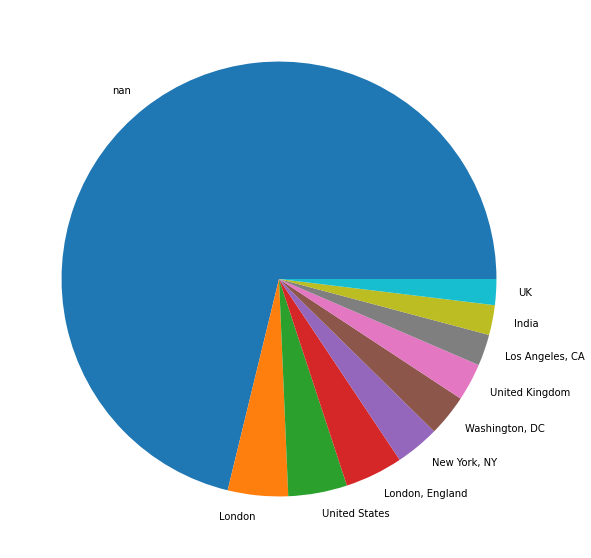

In [95]:
F1 = nltk.FreqDist(data['Location'])
data_f1 = pd.DataFrame({'Location': list(F1.keys()),
                  'Count': list(F1.values())})
# 10 most frequent locations     
ten_most_fre1 = data_f1.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,10))
plt.pie(ten_most_fre1["Count"], labels = ten_most_fre1["Location"])

plt.show()

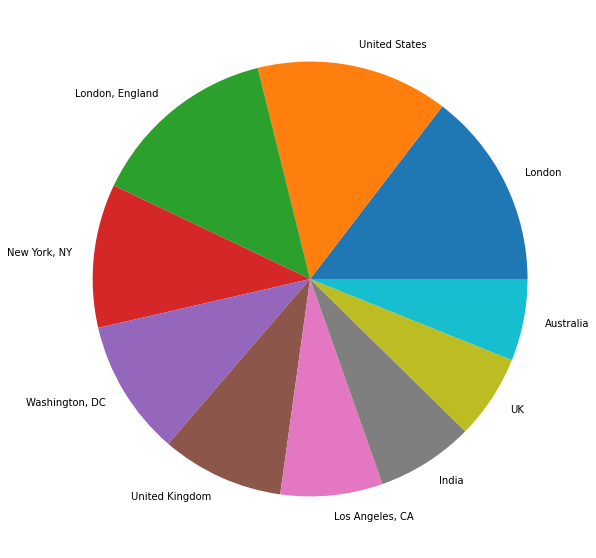

In [96]:
F2 = nltk.FreqDist(data['Location'].dropna())
data_f2 = pd.DataFrame({'Location': list(F2.keys()),
                  'Count': list(F2.values())})
# 10 most frequent locations     
ten_most_fre2 = data_f2.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,10))
plt.pie(ten_most_fre2["Count"], labels = ten_most_fre2["Location"])

plt.show()

We can notice from the previous chart that dropping the Nan values will makes a huge impact on the charts.


London - England - United state have taken a bigger amount of tweets maybe because they have suffered more than the other countries from the disease or maybe the distribution depends on the collection of data.

But there are a huge amount of tweets with no specific location so the distribution of the tweets on countries are not accurate and we can't guarante the above countries to have the biggest amount of tweets.

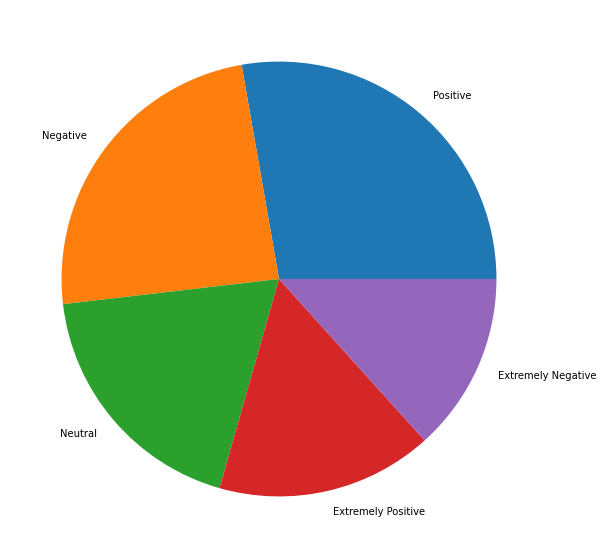

In [97]:
#Sentiment
F3 = nltk.FreqDist(data['Sentiment'])
data_f3 = pd.DataFrame({'Sentiment': list(F3.keys()),
                  'Count': list(F3.values())})
# 10 most frequent locations     
ten_most_fre3 = data_f3.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,10))
plt.pie(ten_most_fre3["Count"], labels = ten_most_fre3["Sentiment"])

plt.show()

Postive and negative sentiments from the tweet are very close and make a big portion.

The Rest are gradient from neutral to extremely positive and negative.

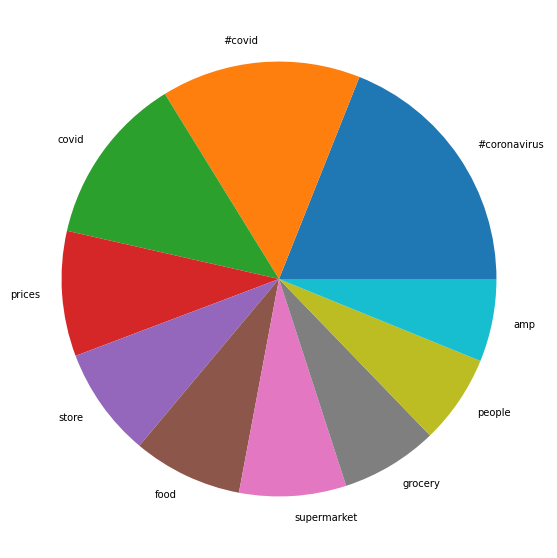

In [98]:
# fdist1 is already computed ubove for the most common hastags
data_f4 = pd.DataFrame({'Hastags': list(fdist1.keys()),
                  'Count': list(fdist1.values())})
# 10 most frequent locations     
ten_most_fre4 = data_f4.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,10))
plt.pie(ten_most_fre4["Count"], labels = ten_most_fre4["Hastags"])

plt.show()

coronavirus and covid make a bigger portion from top ten hashtags and the rest are about people, food ,prices......related to tweets descriping the status during the pandamic.